In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
all_data = pd.read_pickle('./data/no_singletons_data.pkl')
print(all_data)

           Date    Type                   Opponent     Tm   Opp  \
0    2023-11-06     REG           Northern Arizona   95.0  52.0   
1    2023-11-11     REG                  Stonehill  107.0  67.0   
2    2023-11-14     REG   Mississippi Valley State   87.0  53.0   
3    2023-11-19     REG                    Indiana   77.0  57.0   
4    2023-11-20     REG                      Texas   81.0  71.0   
...         ...     ...                        ...    ...   ...   
2371 2024-03-02     REG                     Wagner   57.0  54.0   
2372 2024-03-06  CTOURN               Sacred Heart   60.0  57.0   
2373 2024-03-09  CTOURN  Central Connecticut State   66.0  56.0   
2374 2024-03-12  CTOURN                  Merrimack   54.0  47.0   
2376 2024-03-21    NCAA                     Wagner   90.0  62.0   

                Team  Diff  
0              UConn  43.0  
1              UConn  40.0  
2              UConn  34.0  
3              UConn  20.0  
4              UConn  10.0  
...              ... 

376


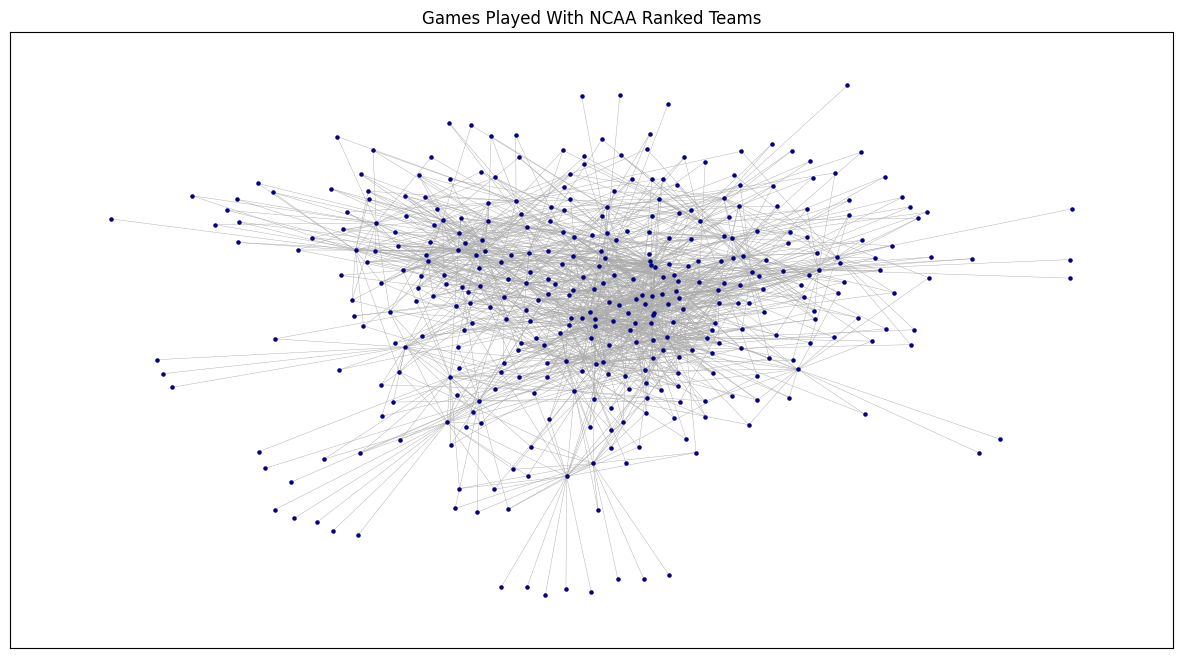

In [57]:
plt.figure(figsize=(15, 8)) # Width and height in inches

G = nx.Graph()

# Add nodes and edges
for index, row in all_data.iterrows():
    G.add_edge(row['Team'], row['Opponent'])

# Define the position of nodes
pos = nx.spring_layout(G)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size = 5, node_color='navy')

print(len(G.nodes))

# Draw edges with labels (weights)
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width = 0.3, edge_color='darkgray')

# edge_labels = {(u, v): d['weight'] for u, v, d in edges}
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Draw node labels
# nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

# Display the graph
plt.title('Games Played With NCAA Ranked Teams')
plt.show()

219


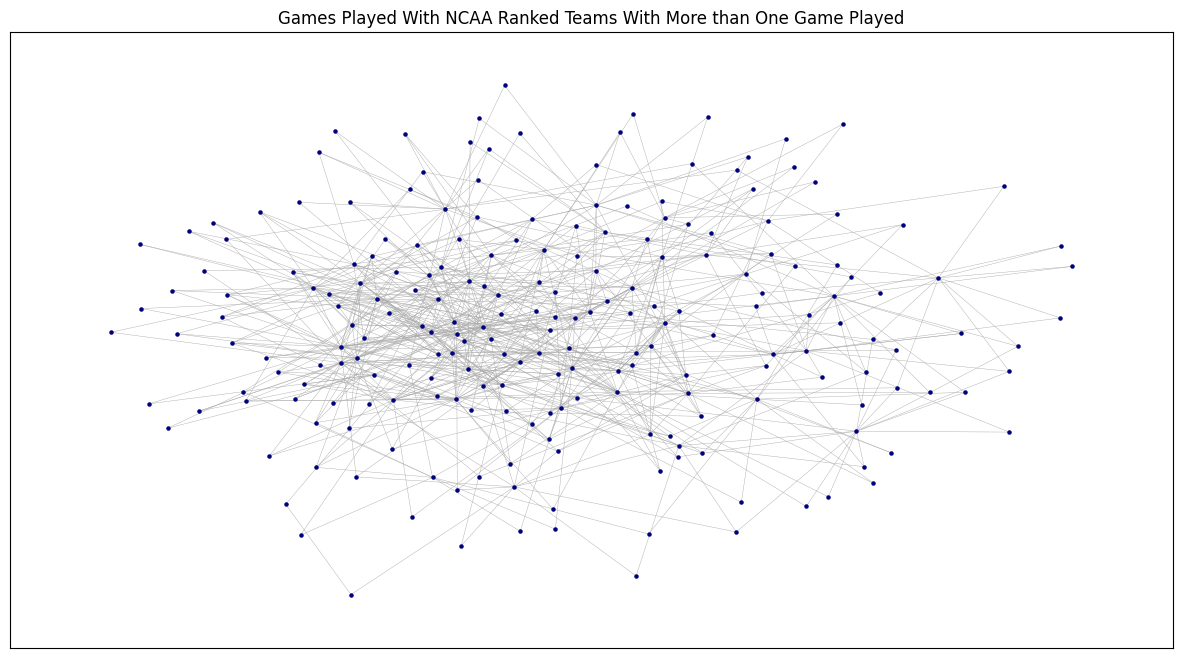

In [23]:
plt.figure(figsize=(15, 8)) # Width and height in inches

G = nx.Graph()

# Add nodes and edges
for index, row in all_data.iterrows():
    G.add_edge(row['Team'], row['Opponent'])

nodes_with_one_connection = [node for node in G.nodes() if G.degree(node) <= 1]
G.remove_nodes_from(nodes_with_one_connection)


# Define the position of nodes
pos = nx.spring_layout(G)


# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size = 5, node_color='navy')

print(len(G.nodes))

# Draw edges with labels (weights)
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width = 0.3, edge_color='darkgray')

# edge_labels = {(u, v): d['weight'] for u, v, d in edges}
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Draw node labels
# nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

# Display the graph
plt.title('Games Played With NCAA Ranked Teams With More than One Game Played')
plt.show()




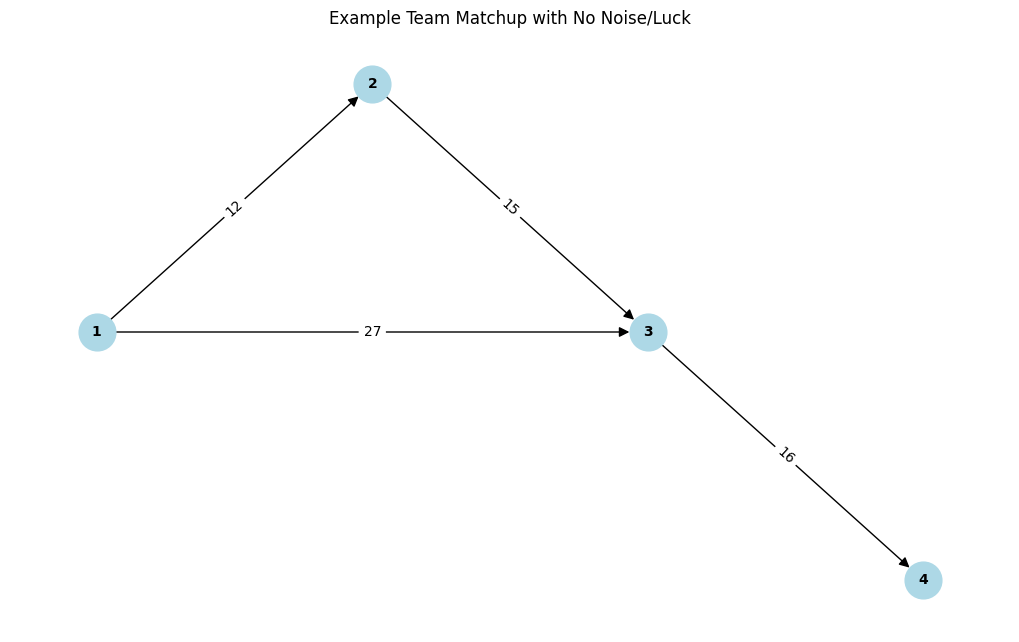

In [36]:
plt.figure(figsize=(10,6))
# Create a directed graph (DAG)
G = nx.DiGraph()
G.add_weighted_edges_from([(1, 2, 12), (1, 3, 27), (2, 3, 15), (3, 4, 16)])

# Manually specify the position of each node
pos = {
    1: (0, 1),
    2: (1, 2),
    3: (2, 1),
    4: (3, 0)
}

# Draw and display the graph with specified positions
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrows=True, arrowstyle='-|>', arrowsize=15)

# Draw edge labels (weights) 
edge_labels = nx.get_edge_attributes(G, 'weight') 
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Example Team Matchup with No Noise/Luck")
plt.show()


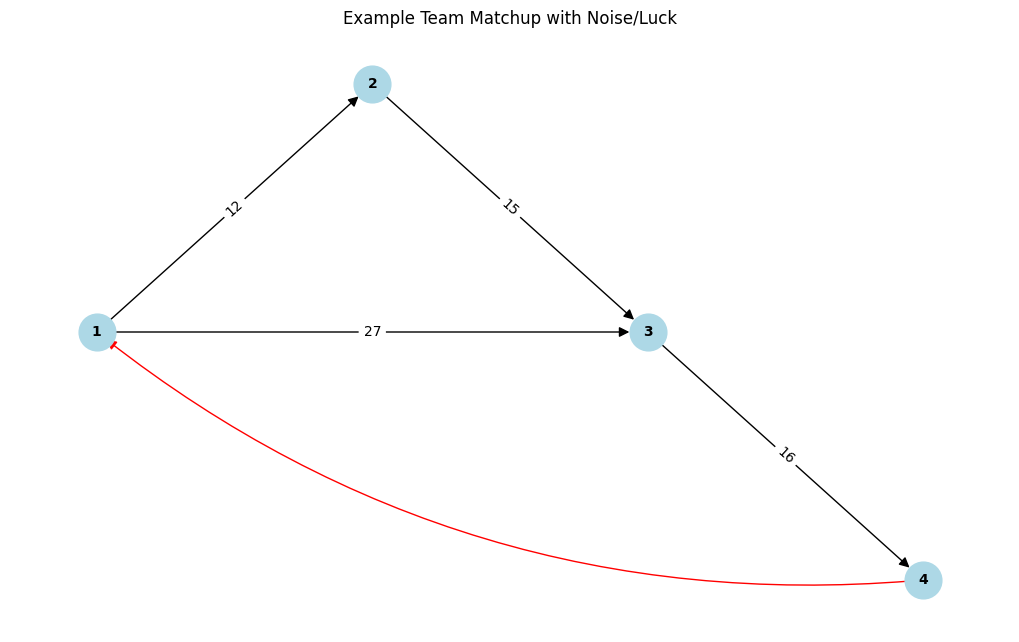

In [51]:
plt.figure(figsize=(10,6))
# Create a directed graph (DAG)
G = nx.DiGraph()
G.add_weighted_edges_from([(1, 2, 12), (1, 3, 27), (2, 3, 15), (3, 4, 16)])

# Manually specify the position of each node
pos = {
    1: (0, 1),
    2: (1, 2),
    3: (2, 1),
    4: (3, 0),
}

# Draw and display the graph with specified positions
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrows=True, arrowstyle='-|>', arrowsize=15)

nx.draw_networkx_edges(G, pos, edgelist=[(4, 1, 20)], edge_color='red', connectionstyle='arc3,rad=-0.2', arrows=True, arrowstyle='-|>', arrowsize=15)


# Draw edge labels (weights) 
edge_labels = nx.get_edge_attributes(G, 'weight') 
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)



plt.title("Example Team Matchup with Noise/Luck")
plt.show()
